In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan Application Status Prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df.drop("Loan_ID",axis=1,inplace=True)
# Checking null values in the dataframe
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

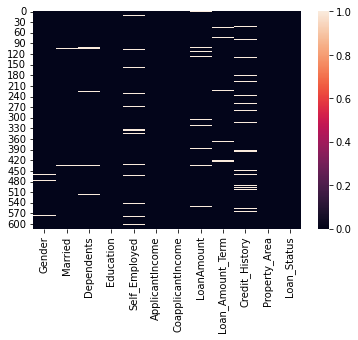

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Using imputation techniques to fill the null values


In [14]:
#checking the mode of the categorical columns to fill null values 
print("Gender : ",df["Gender"].mode())  # we will fill the null values using its mode
print("Married : ",df["Married"].mode())
print("Dependents : ",df["Dependents"].mode())
print("Self_Employed : ",df["Self_Employed"].mode())
print("Credit_History : ",df["Credit_History"].mode())
print("Loan_Amount_Term : ",df["Loan_Amount_Term"].mode())

Gender :  0    Male
Name: Gender, dtype: object
Married :  0    Yes
Name: Married, dtype: object
Dependents :  0    0
Name: Dependents, dtype: object
Self_Employed :  0    No
Name: Self_Employed, dtype: object
Credit_History :  0    1.0
Name: Credit_History, dtype: float64
Loan_Amount_Term :  0    360.0
Name: Loan_Amount_Term, dtype: float64


In [15]:
# Filling the missing values in Gender by its mode male
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode Yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values  by its mode 0
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing values  by its mode No
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing values  by its mode No
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing values by its mode 360
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [16]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#checking the median values of the numerical columns
print("LoanAmount Median : ", df["LoanAmount"].median())

LoanAmount Median :  128.0


In [20]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())


In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

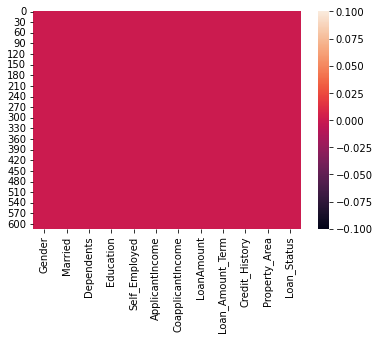

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [25]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Statistical Summary

In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Y    422
N    192
Name: Loan_Status, dtype: int64


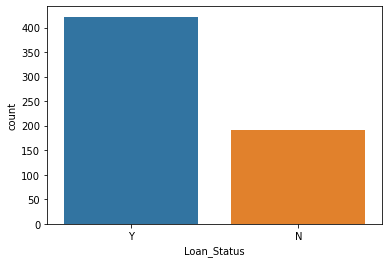

In [28]:
#Data Visualization
# Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


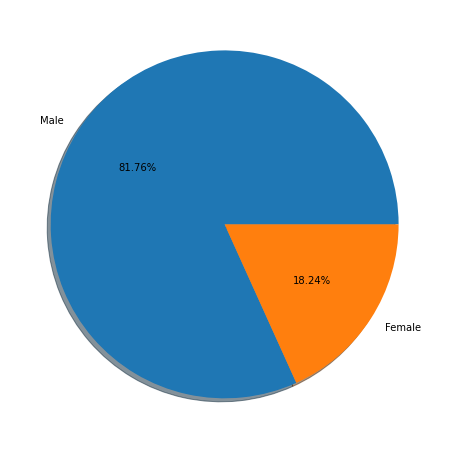

In [29]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


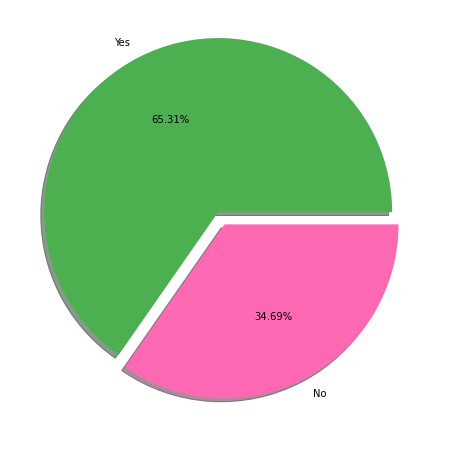

In [30]:
#Visualize the count of marital status of the applicants
print(df["Married"].value_counts())
labels='Yes','No'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors, explode=(0.08 , 0))
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


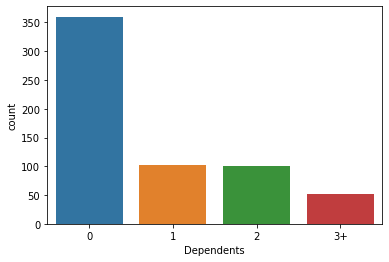

In [31]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


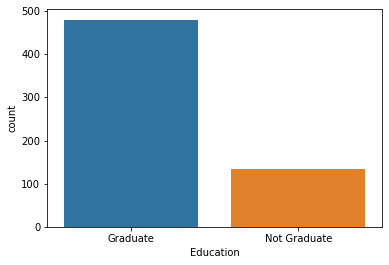

In [32]:
# Visualizing the count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


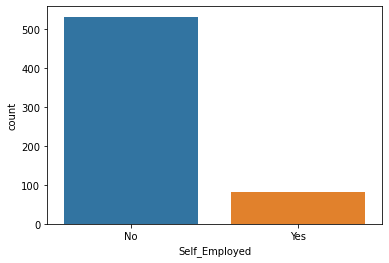

In [33]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


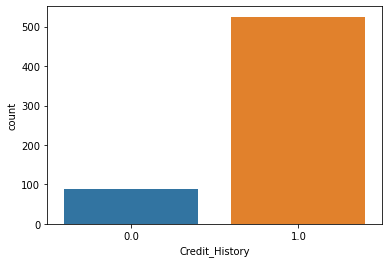

In [34]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

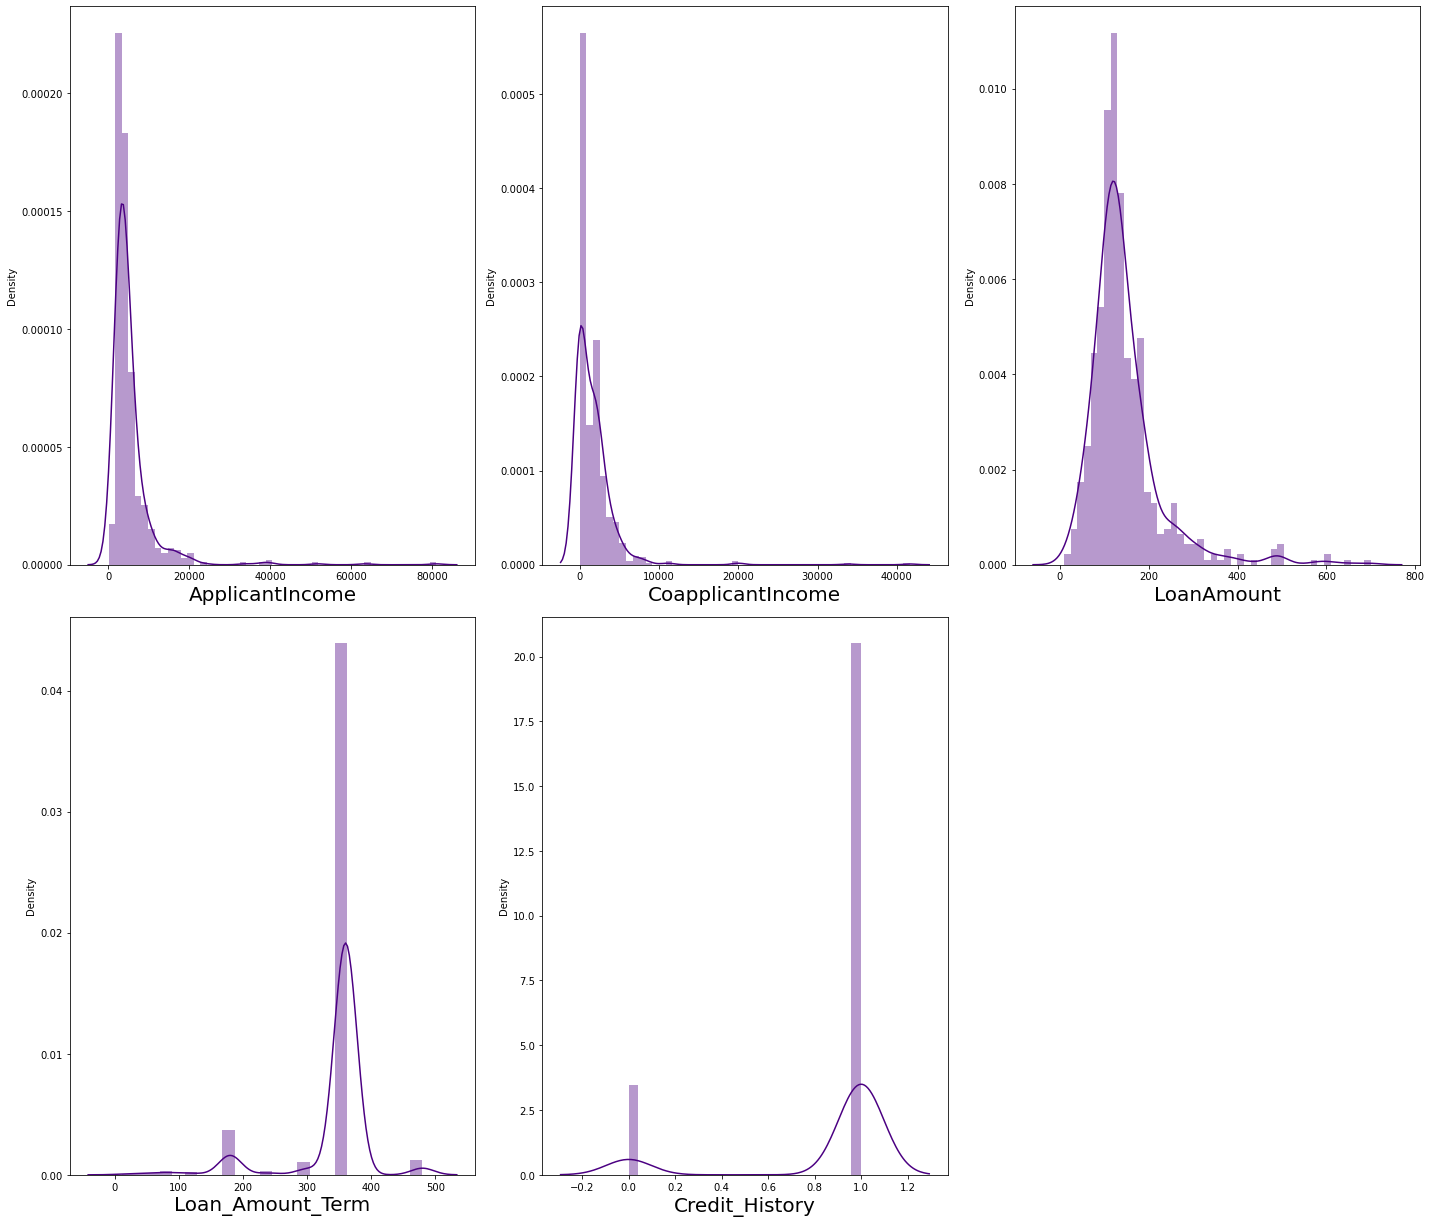

In [35]:
# Checking the distriubtion of data in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

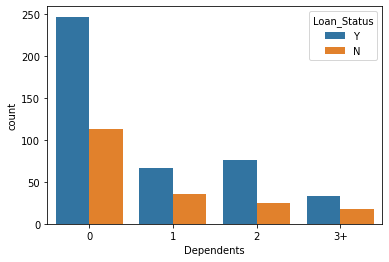

In [36]:
#Visualizing count of Dependents applicants on basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


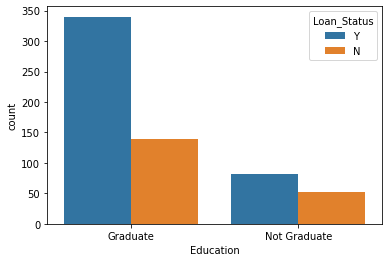

In [37]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


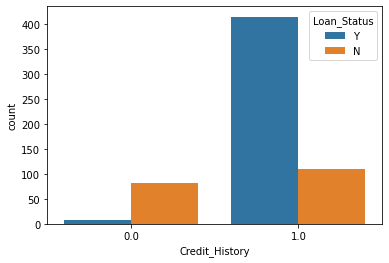

In [38]:
#Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


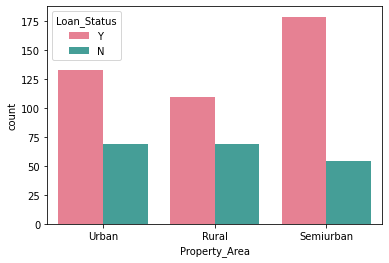

In [39]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


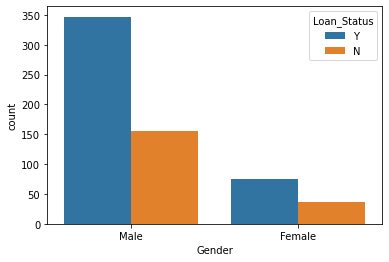

In [40]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


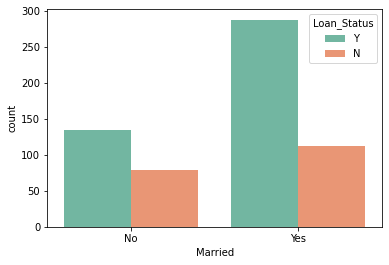

In [41]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

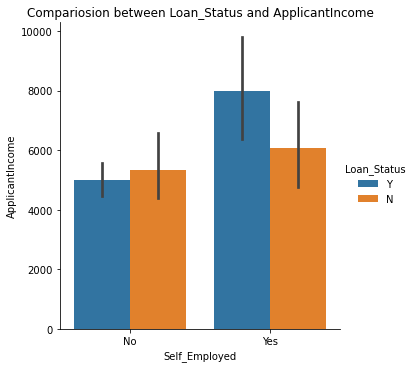

In [42]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()

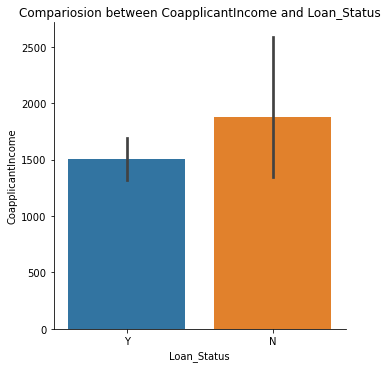

In [43]:
# Checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Compariosion between CoapplicantIncome and Loan_Status")
plt.show()

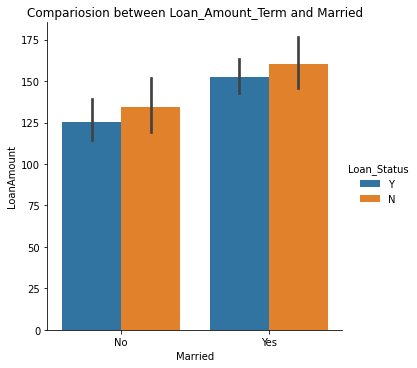

In [44]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()

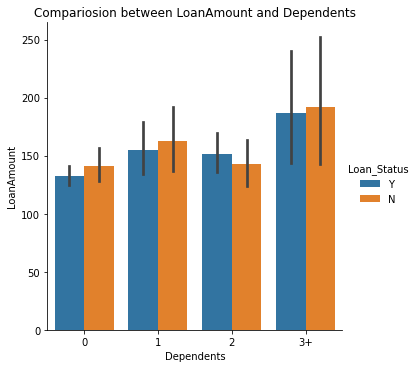

In [45]:
# Checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between LoanAmount and Dependents")
plt.show()

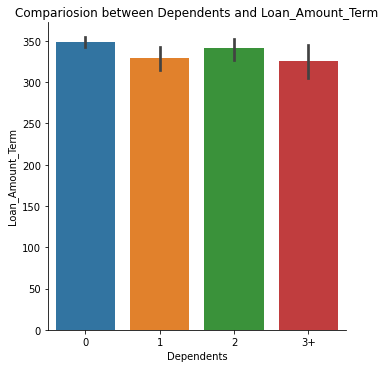

In [46]:
# Checking relation between Loan_Amount_Term and Dependents
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Compariosion between Dependents and Loan_Amount_Term")
plt.show()

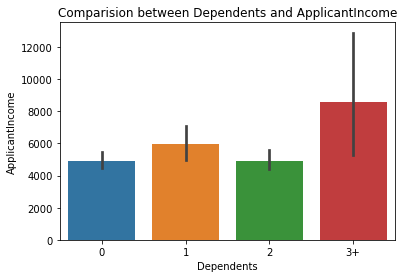

In [47]:
#Applicant income as per Dependents
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

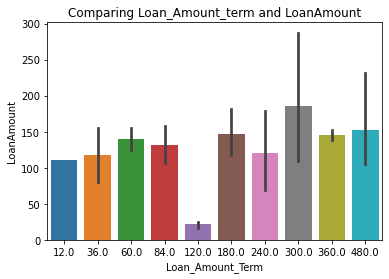

In [48]:
#Comparison between Loan_Amount_term and LoanAmount
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

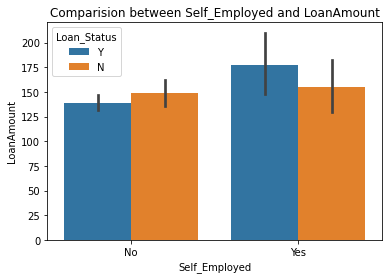

In [49]:
#comparison of loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

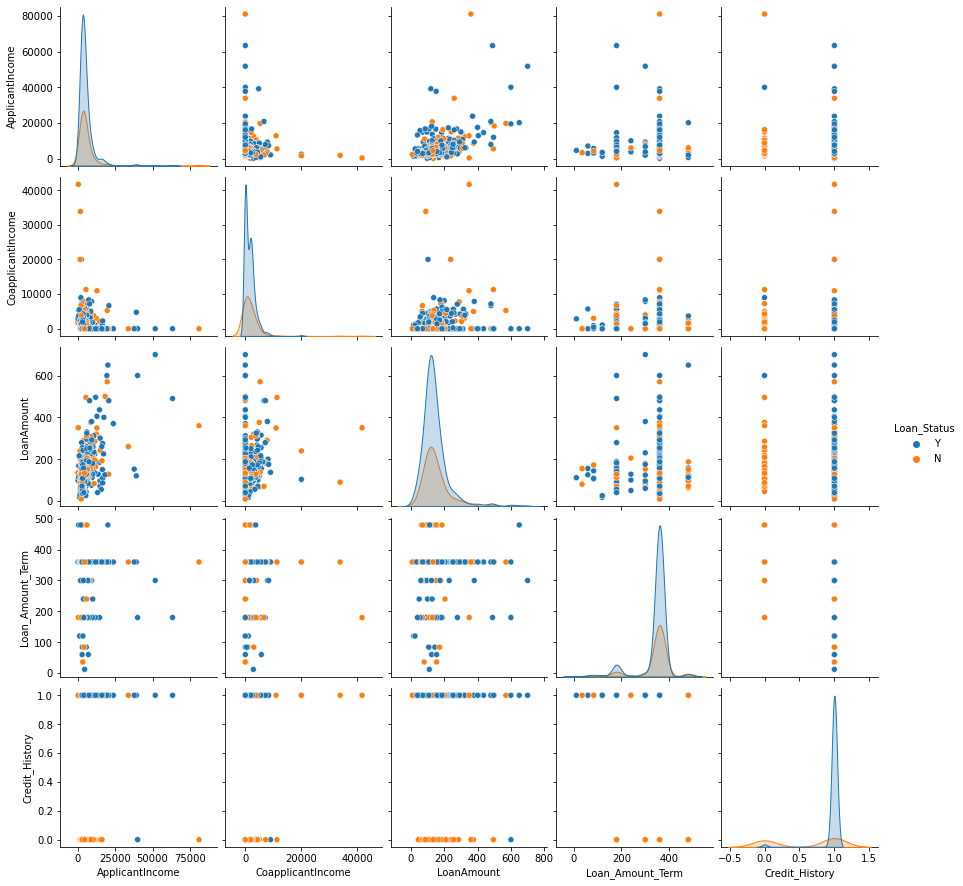

In [50]:
# Checking relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

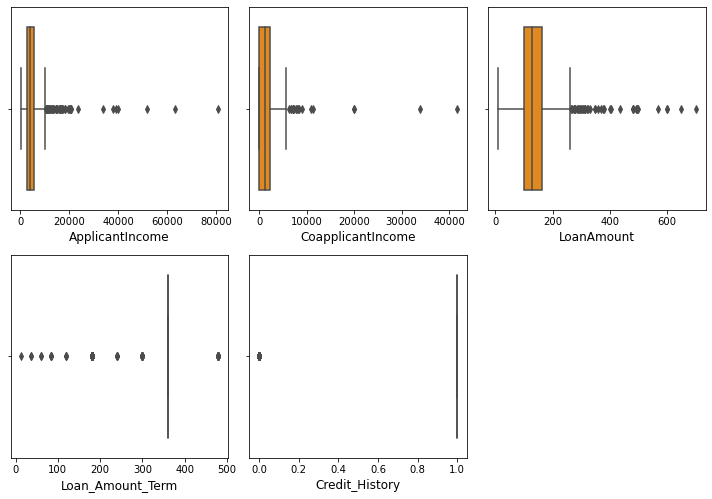

In [51]:
#Checking outliers

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Removing outliers


In [52]:
#Zscore method
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [53]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
new_df.shape

(577, 12)

In [55]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

In [56]:
# Checking the skewness
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

In [57]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [58]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [59]:
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

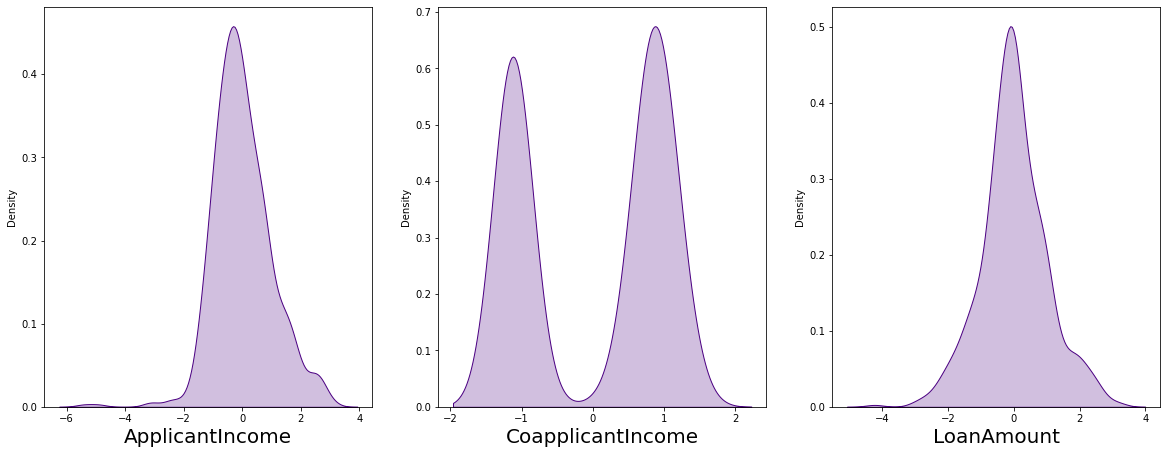

In [60]:
# After removing skewness, checking the data distribution in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [61]:
#Encoding the categorical columns using Label Encoding
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [62]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [63]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [64]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


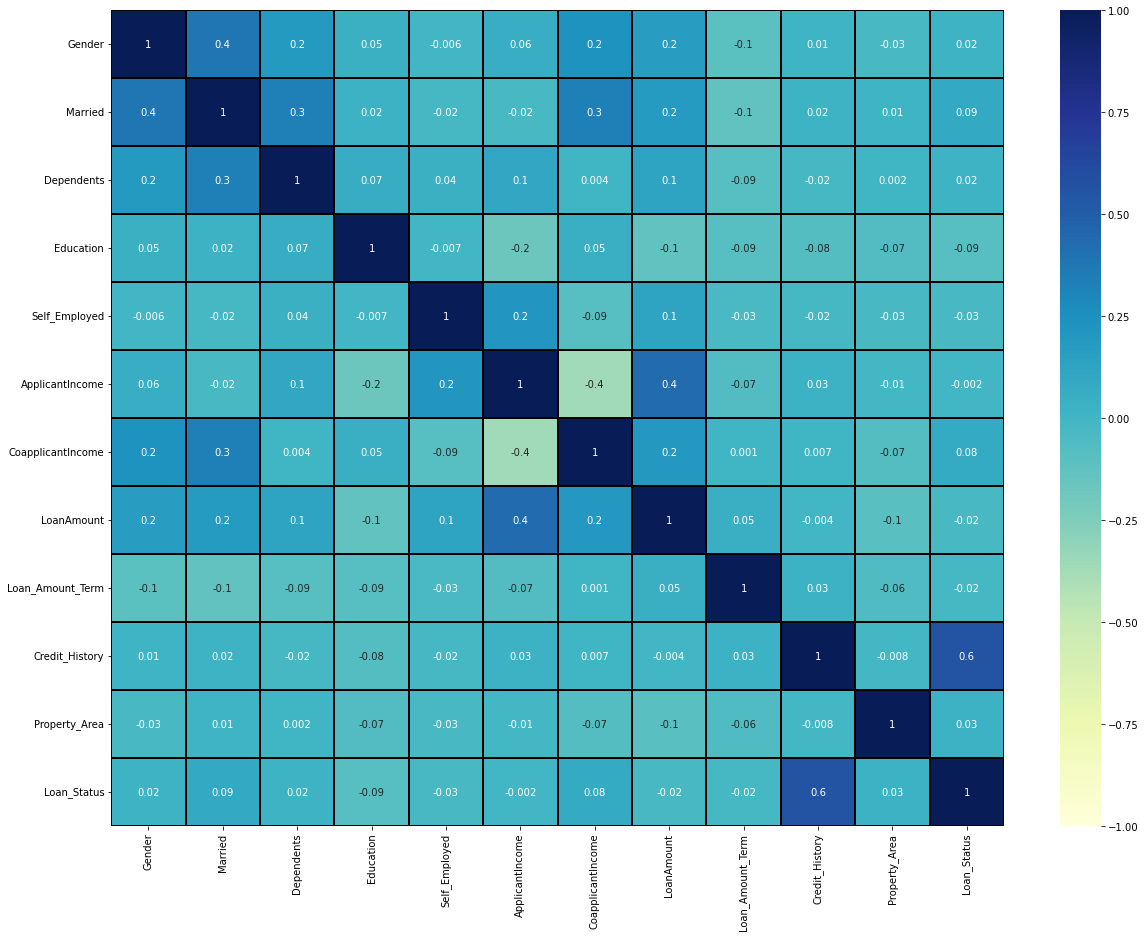

In [65]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [66]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.023609
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

Positive and negative correlation of target and features has been seen

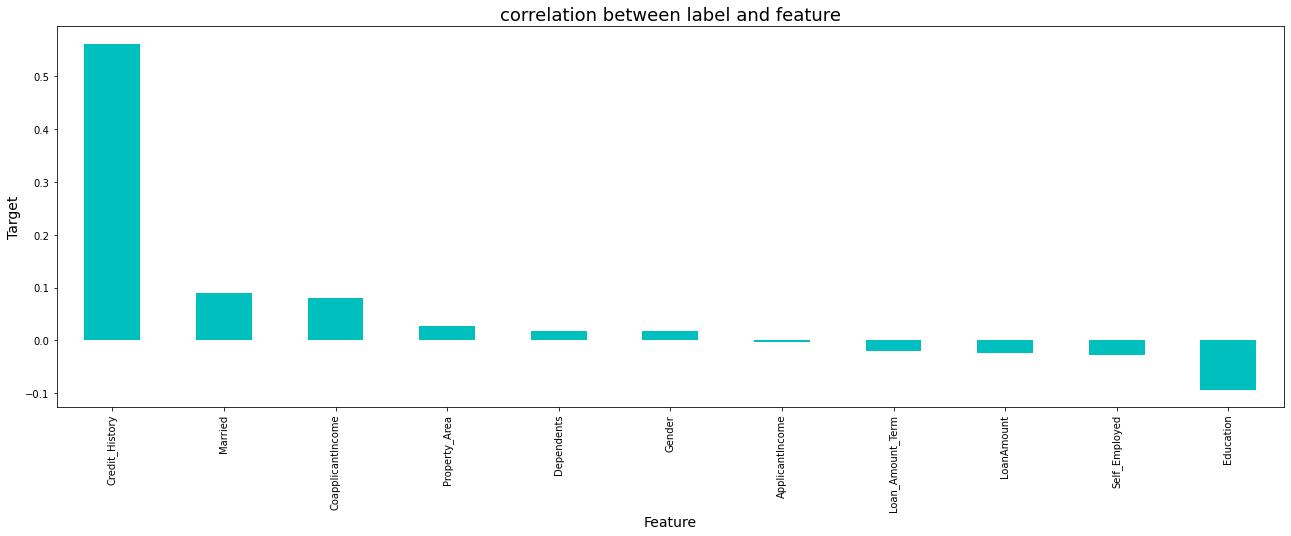

In [67]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature',fontsize=18)
plt.show()

In [68]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [69]:
#Standard Scalarization
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [70]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [71]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


# Model Building

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.891213389121339  on Random_state  96


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [74]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8368200836820083
[[ 99  19]
 [ 20 101]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       118
           1       0.84      0.83      0.84       121

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



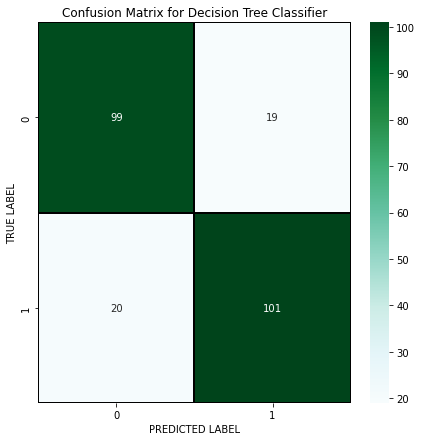

In [75]:
#Confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [76]:
#Accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8577405857740585
[[ 97  21]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       118
           1       0.84      0.89      0.86       121

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



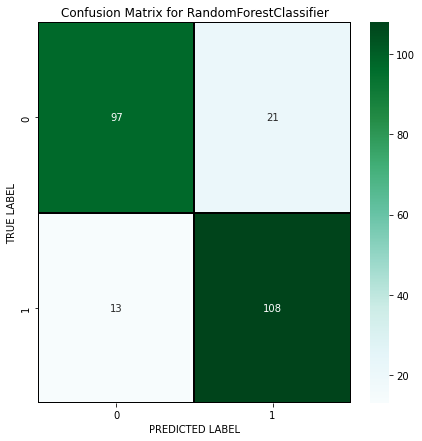

In [77]:
#Confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [78]:
#Accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7364016736401674
[[ 70  48]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       118
           1       0.69      0.88      0.77       121

    accuracy                           0.74       239
   macro avg       0.76      0.73      0.73       239
weighted avg       0.76      0.74      0.73       239



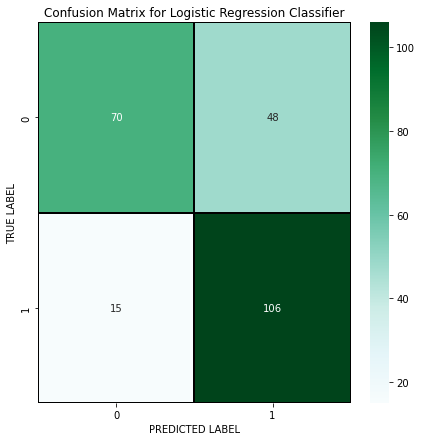

In [79]:
#Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

0.7782426778242678
[[ 77  41]
 [ 12 109]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       118
           1       0.73      0.90      0.80       121

    accuracy                           0.78       239
   macro avg       0.80      0.78      0.77       239
weighted avg       0.80      0.78      0.77       239



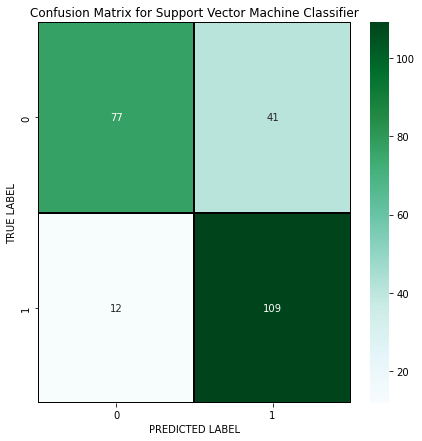

In [80]:
#Accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

#Confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

0.7364016736401674
[[87 31]
 [32 89]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       118
           1       0.74      0.74      0.74       121

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



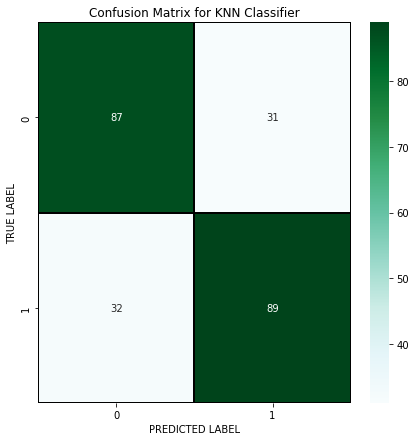

In [81]:
#Accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

#confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [87]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print("Decision Tree Classifier : ",cross_val_score(DTC,x,y,cv=5).mean())
# cv score for Random Forest Classifier
print("Random Forest Classifier : ",cross_val_score(RFC,x,y,cv=5).mean())
# cv score for Logistic Regression Classifier
print("Logistic Regression Classifier : ",cross_val_score(LR,x,y,cv=5).mean())
# cv score for Support Vector Machine Classifier
print("Vector Machine Classifier : ",cross_val_score(svc,x,y,cv=5).mean())
# cv score for KNN Classifier
print("KNN Classifier : ",cross_val_score(knn,x,y,cv=5).mean())

Decision Tree Classifier :  0.7877594339622641
Random Forest Classifier :  0.8392688679245282
Logistic Regression Classifier :  0.7136084905660377
Vector Machine Classifier :  0.7274135220125786
KNN Classifier :  0.7123349056603774


In [93]:
#Hyper Parameter Tuning

parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [94]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [97]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [98]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.00836820083683


# Plotting ROC and compare AUC for the final model

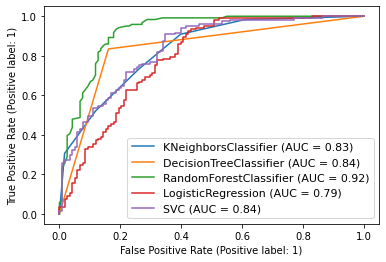

In [92]:
disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

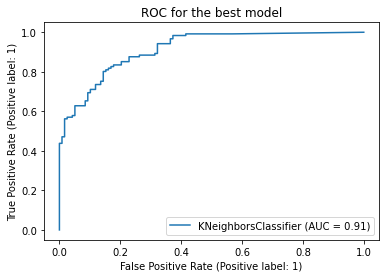

In [99]:
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [100]:
#Saving the model
joblib.dump(Loan,"LoanApplicationStatus.pkl")

['LoanApplicationStatus.pkl']

In [101]:
# Loading the saved model
model=joblib.load("LoanApplicationStatus.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [102]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
234,0,0
235,0,0
236,0,0
237,1,0


Predicted values and actual values are almost same.

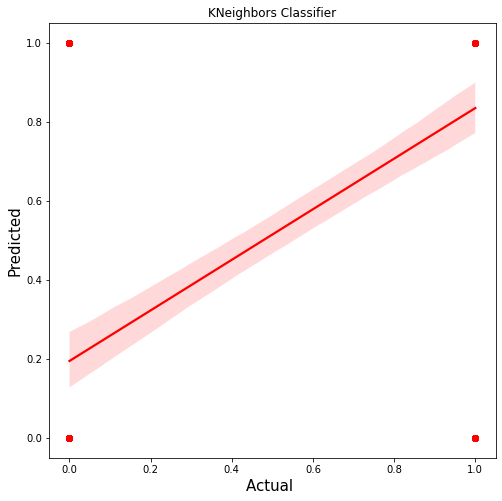

In [103]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("KNeighbors Classifier")
plt.show()